<a href="https://colab.research.google.com/github/gunelatakishyeva/DeepLearningProjects/blob/main/training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

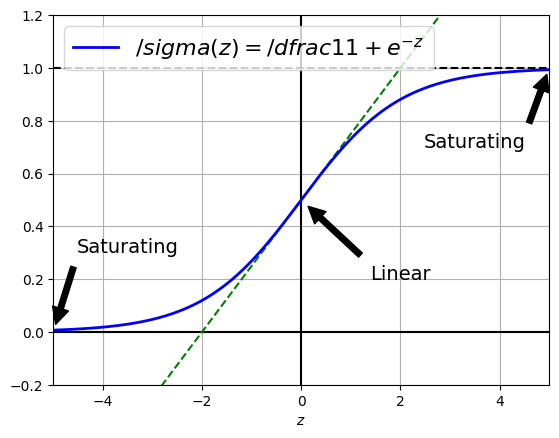

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1/(1+ np.exp(-z))

z=np.linspace(-5,5,200)

plt.plot([-5,5],[0,0],'k-')
plt.plot([-5,5],[1,1],'k--')
plt.plot([0,0],[-0.2,1.2],'k-')
plt.plot([-5,5],[-3/4,7/4],'g--')
plt.plot(z,sigmoid(z),'b-',linewidth=2,
         label=r'$/sigma(z)=/dfrac{1}{1+e^{-z}}$')
props=dict(facecolor='black',shrink=0.1)
plt.annotate('Saturating',xytext=(3.5,0.7),xy=(5,1),arrowprops=props,
             fontsize=14,ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)


plt.show()

#Xavier and He Initialization

In [2]:
import tensorflow as tf
dense=tf.keras.layers.Dense(50,activation='relu',
                            kernel_initializer='he_normal')

In [3]:
he_avg_init=tf.keras.initializers.VarianceScaling(scale=2,mode='fan_avg',
                                                  distribution='uniform')
dense=tf.keras.layers.Dense(50,activation='sigmoid',
                            kernel_initializer=he_avg_init)

#NonSaturating Activation Functions

**Leaky Relu**

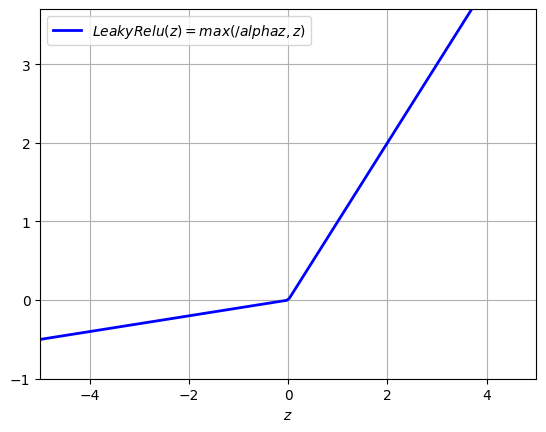

In [4]:
def leaky_relu(z,alpha):
  return np.maximum(alpha*z,z)

z=np.linspace(-5,5,200)
plt.plot(z,leaky_relu(z,0.1),'b-',linewidth=2,label=r'$LeakyRelu(z)=max(/alpha z,z)$')
plt.grid(True)
plt.xlabel("$z$")
plt.axis([-5,5,-1,3.7])
plt.legend()
plt.show()

In [5]:
leaky_relu=tf.keras.layers.LeakyReLU(alpha=0.2)
dense=tf.keras.layers.Dense(50,activation=leaky_relu,
                            kernel_initializer='he_normal')

In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,kernel_initializer='he_normal'),  #no activation
    tf.keras.layers.LeakyReLU(alpha=0.2)   #activation as a separate layer
])



#ELU

In [7]:
dense=tf.keras.layers.Dense(50,activation='elu',
                            kernel_initializer='he_normal')

#SELU

In [8]:
tf.random.set_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100,activation='selu',
                                  kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=['accuracy'])

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

4422102/4422102 [==============================] - 0s 0us/step


In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_scaled_train=(X_train-pixel_means)/pixel_stds
X_scaled_valid=(X_valid-pixel_means)/pixel_stds
X_scaled_test=(X_test-pixel_means)/pixel_stds

In [13]:
history=model.fit(X_scaled_train,y_train,epochs=5,
                  validation_data=(X_scaled_valid,y_valid))

Epoch 1/5
1719/1719 [==============================] - 66s 27ms/step - loss: 1.1196 - accuracy: 0.5688 - val_loss: 0.7688 - val_accuracy: 0.7284
Epoch 2/5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.7056 - accuracy: 0.7399 - val_loss: 0.6388 - val_accuracy: 0.7786
Epoch 3/5
1719/1719 [==============================] - 44s 26ms/step - loss: 0.5941 - accuracy: 0.7855 - val_loss: 0.5925 - val_accuracy: 0.7850
Epoch 4/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.6710 - accuracy: 0.7522 - val_loss: 0.5983 - val_accuracy: 0.7954
Epoch 5/5
1719/1719 [==============================] - 43s 25ms/step - loss: 0.5437 - accuracy: 0.8079 - val_loss: 0.5187 - val_accuracy: 0.8200


#GELU,Swish,Mish

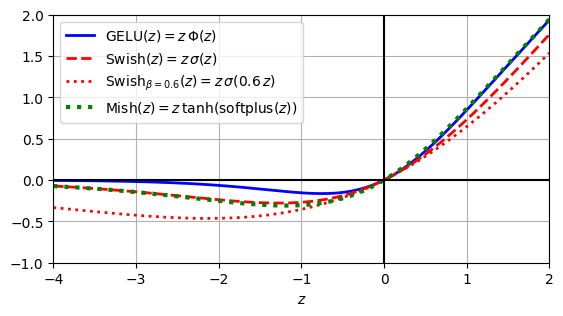

In [14]:
def swish(z,beta=1):
  return z*sigmoid(beta*z)

def approx_gelu(z):
  return swish(z,beta=1.702)

def softplus(z):
  return np.log(1+np.exp(z))

def mish(z):
  return z*np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()

#Batch Normalization

In [15]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [16]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation = "relu",
                          kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [17]:
[(var.name,var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [19]:
history=model.fit(X_train,y_train,epochs=10,
                  validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 5ms/step - loss: 0.5482 - accuracy: 0.8100 - val_loss: 0.3996 - val_accuracy: 0.8552
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4015 - accuracy: 0.8559 - val_loss: 0.3685 - val_accuracy: 0.8642
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3629 - accuracy: 0.8699 - val_loss: 0.3425 - val_accuracy: 0.8758
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3363 - accuracy: 0.8792 - val_loss: 0.3359 - val_accuracy: 0.8756
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3167 - accuracy: 0.8854 - val_loss: 0.3256 - val_accuracy: 0.8806
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2968 - accuracy: 0.8924 - val_loss: 0.3250 - val_accuracy: 0.8786
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2841 - accuracy: 0.8957 - val_loss: 0.3272 - val_accuracy

In [20]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8820


[0.33770230412483215, 0.8820000290870667]

In [21]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [22]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100,kernel_initializer='he_normal',use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10,kernel_initializer='he_normal'),
    tf.keras.layers.Activation('sigmoid')
])

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history=model.fit(X_train,y_train,epochs=5,
                  validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5965 - accuracy: 0.7995 - val_loss: 0.4336 - val_accuracy: 0.8442
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4289 - accuracy: 0.8506 - val_loss: 0.3718 - val_accuracy: 0.8654
Epoch 3/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3840 - accuracy: 0.8650 - val_loss: 0.3550 - val_accuracy: 0.8726
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3530 - accuracy: 0.8745 - val_loss: 0.3438 - val_accuracy: 0.8726
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3306 - accuracy: 0.8836 - val_loss: 0.3303 - val_accuracy: 0.8780


In [24]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8688


[0.35808128118515015, 0.8687999844551086]

#Gradient Clipping

In [25]:
optimizer=tf.keras.optimizers.SGD(clipvalue=0.1)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [26]:
optimizer=tf.keras.optimizers.SGD(clipnorm=0.1)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#Reusing Pretrained Layers

In [27]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8,activation='softmax')
])

In [28]:
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model_A.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history=model_A.fit(X_train_A,y_train_A,epochs=20,
                  validation_data=(X_valid_A,y_valid_A))

Epoch 1/20
1376/1376 [==============================] - 5s 3ms/step - loss: 1.2461 - accuracy: 0.6404 - val_loss: 0.7469 - val_accuracy: 0.7837
Epoch 2/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.6190 - accuracy: 0.8142 - val_loss: 0.5171 - val_accuracy: 0.8360
Epoch 3/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.4823 - accuracy: 0.8474 - val_loss: 0.4381 - val_accuracy: 0.8546
Epoch 4/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.4206 - accuracy: 0.8622 - val_loss: 0.3932 - val_accuracy: 0.8686
Epoch 5/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.3841 - accuracy: 0.8727 - val_loss: 0.3670 - val_accuracy: 0.8752
Epoch 6/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.3595 - accuracy: 0.8796 - val_loss: 0.3473 - val_accuracy: 0.8782
Epoch 7/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.3420 - accuracy: 0.8846 - val_loss: 0.3329 - val_accuracy:

In [29]:
model_A.save('my_model_A')

In [30]:
model_A.evaluate(X_test_A,y_test_A)

250/250 [==============================] - 1s 2ms/step - loss: 0.2918 - accuracy: 0.8965


[0.2917955219745636, 0.8964999914169312]

In [31]:
tf.random.set_seed(42)
model_B=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])


In [32]:
history=model_B.fit(X_train_B,y_train_B,epochs=20,
                    validation_data=(X_valid_B,y_valid_B))
model_B.save('my_model_B')

Epoch 1/20
7/7 [==============================] - 1s 40ms/step - loss: 0.7173 - accuracy: 0.4500 - val_loss: 0.7051 - val_accuracy: 0.4728
Epoch 2/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6962 - accuracy: 0.4700 - val_loss: 0.6875 - val_accuracy: 0.4847
Epoch 3/20
7/7 [==============================] - 0s 18ms/step - loss: 0.6771 - accuracy: 0.5200 - val_loss: 0.6710 - val_accuracy: 0.5371
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6580 - accuracy: 0.5850 - val_loss: 0.6585 - val_accuracy: 0.5885
Epoch 5/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6446 - accuracy: 0.6500 - val_loss: 0.6460 - val_accuracy: 0.6419
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6314 - accuracy: 0.7200 - val_loss: 0.6345 - val_accuracy: 0.6993
Epoch 7/20
7/7 [==============================] - 0s 30ms/step - loss: 0.6187 - accuracy: 0.7550 - val_loss: 0.6233 - val_accuracy: 0.7329
Epoch 8/20
7/7 [===========

In [33]:
model_B.evaluate(X_test_B,y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.8850


[0.5025513172149658, 0.8849999904632568]

In [34]:
model_A=tf.keras.models.load_model('my_model_A')
model_B_on_A=tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [35]:
tf.random.set_seed(42)

In [36]:
model_A_clone=tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [37]:
model_B_on_A=tf.keras.Sequential(model_A_clone.layers[:-1])  #clone neuronlari kopyalayir,layer'leri kopyalamir.
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [38]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable=False

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])

In [39]:
model_B_on_A.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 98801 (385.94 KB)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 98700 (385.55 KB)
_________________________________________________________________


In [40]:
model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                 validation_data=(X_valid_B,y_valid_B))

for layer in model_B_on_A.layers[:-1]:
  layer.trainable=True

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=optimizer,
                     metrics=['accuracy'])
history=model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                         validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 54ms/step - loss: 0.7157 - accuracy: 0.5700 - val_loss: 0.6153 - val_accuracy: 0.6706
Epoch 2/4
7/7 [==============================] - 0s 17ms/step - loss: 0.5753 - accuracy: 0.7050 - val_loss: 0.5904 - val_accuracy: 0.7023
Epoch 3/4
7/7 [==============================] - 0s 16ms/step - loss: 0.5626 - accuracy: 0.7200 - val_loss: 0.5838 - val_accuracy: 0.7013
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.5484 - accuracy: 0.7650 - val_loss: 0.5722 - val_accuracy: 0.7201
Epoch 1/16
7/7 [==============================] - 1s 56ms/step - loss: 0.5204 - accuracy: 0.8150 - val_loss: 0.5157 - val_accuracy: 0.7814
Epoch 2/16
7/7 [==============================] - 0s 17ms/step - loss: 0.4685 - accuracy: 0.8250 - val_loss: 0.4607 - val_accuracy: 0.8546
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.4205 - accuracy: 0.8650 - val_loss: 0.4337 - val_accuracy: 0.8635
Epoch 4/16
7/7 [===============

In [41]:
def build_model(seed=42):
  tf.random.set_seed(42)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28,28]),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10,activation='softmax')
  ])

def build_train_model(optimizer):
  model=build_model()
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model.fit(X_train,y_train,epochs=10,
                   validation_data=(X_valid,y_valid))

#Momentum optimization

In [42]:
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3,momentum=0.9)

In [43]:
history_sgd=build_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.6168 - accuracy: 0.7884 - val_loss: 0.4083 - val_accuracy: 0.8484
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4351 - accuracy: 0.8453 - val_loss: 0.3732 - val_accuracy: 0.8616
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3938 - accuracy: 0.8589 - val_loss: 0.3427 - val_accuracy: 0.8696
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3671 - accuracy: 0.8675 - val_loss: 0.3362 - val_accuracy: 0.8700
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3500 - accuracy: 0.8729 - val_loss: 0.3280 - val_accuracy: 0.8760
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3327 - accuracy: 0.8779 - val_loss: 0.3373 - val_accuracy: 0.8758
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3213 - accuracy: 0.8832 - val_loss: 0.3274 - val_acc

#Nesterov Accelerated Gradient

In [44]:
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3,momentum=0.9, nesterov=True)

In [45]:
history_nesterov=build_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.6117 - accuracy: 0.7857 - val_loss: 0.4215 - val_accuracy: 0.8448
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4392 - accuracy: 0.8432 - val_loss: 0.3747 - val_accuracy: 0.8622
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3963 - accuracy: 0.8572 - val_loss: 0.3461 - val_accuracy: 0.8744
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3691 - accuracy: 0.8674 - val_loss: 0.3395 - val_accuracy: 0.8762
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3506 - accuracy: 0.8730 - val_loss: 0.3244 - val_accuracy: 0.8802
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3325 - accuracy: 0.8796 - val_loss: 0.3267 - val_accuracy: 0.8814
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3194 - accuracy: 0.8837 - val_loss: 0.3207 - val_ac

#AdaGrad

In [46]:
optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001)

In [47]:
history_adagrad=build_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.8873 - accuracy: 0.7081 - val_loss: 0.6128 - val_accuracy: 0.7830
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6390 - accuracy: 0.7803 - val_loss: 0.5356 - val_accuracy: 0.8066
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5787 - accuracy: 0.8010 - val_loss: 0.4981 - val_accuracy: 0.8210
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5455 - accuracy: 0.8106 - val_loss: 0.4762 - val_accuracy: 0.8286
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5243 - accuracy: 0.8167 - val_loss: 0.4585 - val_accuracy: 0.8362
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5074 - accuracy: 0.8223 - val_loss: 0.4466 - val_accuracy: 0.8406
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4939 - accuracy: 0.8272 - val_loss: 0.4394 - val_acc

#RMSProp

In [48]:
optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3,rho=0.9)

In [49]:
history_rmsprop=build_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5031 - accuracy: 0.8212 - val_loss: 0.3522 - val_accuracy: 0.8674
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3795 - accuracy: 0.8639 - val_loss: 0.3635 - val_accuracy: 0.8640
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3472 - accuracy: 0.8733 - val_loss: 0.3354 - val_accuracy: 0.8786
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3248 - accuracy: 0.8826 - val_loss: 0.3167 - val_accuracy: 0.8824
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3075 - accuracy: 0.8873 - val_loss: 0.3255 - val_accuracy: 0.8830
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2913 - accuracy: 0.8929 - val_loss: 0.3323 - val_accuracy: 0.8812
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2804 - accuracy: 0.8966 - val_loss: 0.3214 - val_ac

#Adam Optimization

In [50]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3,beta_1=0.9,
                                   beta_2=0.999)
history_adam=build_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 0.5090 - accuracy: 0.8169 - val_loss: 0.3671 - val_accuracy: 0.8644
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3858 - accuracy: 0.8605 - val_loss: 0.3622 - val_accuracy: 0.8656
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3512 - accuracy: 0.8718 - val_loss: 0.3453 - val_accuracy: 0.8754
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3254 - accuracy: 0.8802 - val_loss: 0.3265 - val_accuracy: 0.8752
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3067 - accuracy: 0.8863 - val_loss: 0.3104 - val_accuracy: 0.8806
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2922 - accuracy: 0.8908 - val_loss: 0.3303 - val_accuracy: 0.8802
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2781 - accuracy: 0.8957 - val_loss: 0.3222 - val_ac

#Exponential Scheduling

learning_rate=initial_learning_rate*decay_rate**(step/decay_steps) bold text

In [51]:
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,
                                                 decay_steps=20_000,
                                                 decay_rate=0.1,
                                                 staircase=False)

optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [52]:
history_exponential_scheduling=build_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.6030 - accuracy: 0.7908 - val_loss: 0.4166 - val_accuracy: 0.8500
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4440 - accuracy: 0.8425 - val_loss: 0.3815 - val_accuracy: 0.8626
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4094 - accuracy: 0.8543 - val_loss: 0.3632 - val_accuracy: 0.8694
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3840 - accuracy: 0.8638 - val_loss: 0.3545 - val_accuracy: 0.8744
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3689 - accuracy: 0.8675 - val_loss: 0.3474 - val_accuracy: 0.8744
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3542 - accuracy: 0.8724 - val_loss: 0.3477 - val_accuracy: 0.8786
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3473 - accuracy: 0.8746 - val_loss: 0.3414 - val_ac

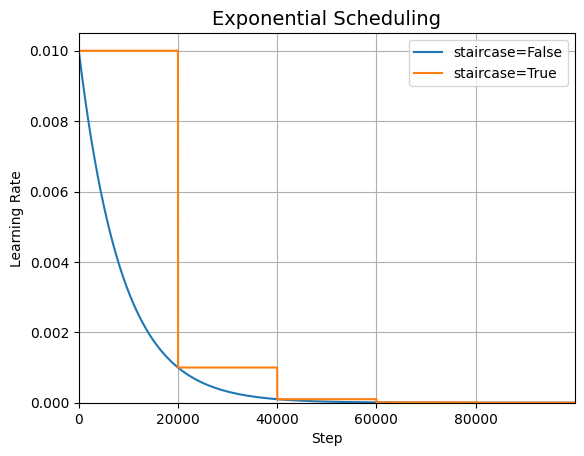

In [53]:
# extra code – this cell plots exponential scheduling

initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#Piecewise Constant Scheduling

In [54]:
lr_schedule=tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000,80_000],
    values=[0.01,0.005,0.001])

optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule)
history_piecewise_scheduling=build_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5971 - accuracy: 0.7950 - val_loss: 0.4214 - val_accuracy: 0.8428
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4369 - accuracy: 0.8446 - val_loss: 0.3739 - val_accuracy: 0.8644
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3958 - accuracy: 0.8587 - val_loss: 0.3488 - val_accuracy: 0.8722
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3700 - accuracy: 0.8662 - val_loss: 0.3450 - val_accuracy: 0.8710
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3499 - accuracy: 0.8733 - val_loss: 0.3340 - val_accuracy: 0.8766
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3325 - accuracy: 0.8798 - val_loss: 0.3369 - val_accuracy: 0.8770
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3204 - accuracy: 0.8835 - val_loss: 0.3324 - val_ac

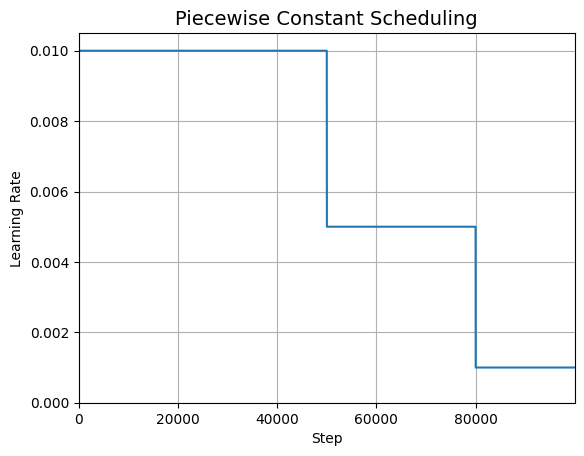

In [55]:
boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#Avoiding Overfitting Through Regularization

In [56]:
layer=tf.keras.layers.Dense(100,activation='relu',
                            kernel_initializer='he_normal',
                            kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [57]:
tf.random.set_seed(42)

from functools import partial
RegularizedDense=partial(tf.keras.layers.Dense,
                       activation='relu',
                       kernel_initializer='he_normal',
                       kernel_regularizer=tf.keras.regularizers.l2(0.01))

model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10,activation='softmax')
])

In [58]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.02),
              metrics=['accuracy'])

In [59]:
history=model.fit(X_train,y_train,epochs=2,
                  validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 [==============================] - 7s 3ms/step - loss: 3.1246 - accuracy: 0.7761 - val_loss: 1.8620 - val_accuracy: 0.8228
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4272 - accuracy: 0.8145 - val_loss: 1.1304 - val_accuracy: 0.8162


#Dropout

In [60]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])



In [61]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [62]:
history=model.fit(X_train,y_train,epochs=10,
                  validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9722 - accuracy: 0.6455 - val_loss: 0.5768 - val_accuracy: 0.7990
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6679 - accuracy: 0.7606 - val_loss: 0.5023 - val_accuracy: 0.8248
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5938 - accuracy: 0.7866 - val_loss: 0.4664 - val_accuracy: 0.8294
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5556 - accuracy: 0.8004 - val_loss: 0.4436 - val_accuracy: 0.8374
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5318 - accuracy: 0.8080 - val_loss: 0.4263 - val_accuracy: 0.8432
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5126 - accuracy: 0.8151 - val_loss: 0.4189 - val_accuracy: 0.8474
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4996 - accuracy: 0.8194 - val_loss: 0.4044 - val_accuracy:

In [63]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8506


[0.41481366753578186, 0.850600004196167]

# MC Dropout

In [64]:
tf.random.set_seed(42)

y_probas=np.stack([model(X_test,training=True)
                    for sample in range(100)])
y_proba=y_probas.mean(axis=0)

In [65]:
model.predict(X_test[:1]).round(3)

1/1 [==============================] - 0s 78ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.027, 0.   , 0.224, 0.   ,
        0.748]], dtype=float32)

In [66]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.001, 0.   , 0.131, 0.   , 0.26 , 0.003,
       0.603], dtype=float32)

In [67]:
y_std=y_probas.std(axis=0)
y_std[0].round(3)

array([0.001, 0.001, 0.   , 0.002, 0.002, 0.159, 0.   , 0.16 , 0.006,
       0.2  ], dtype=float32)

#Max Norm

In [71]:
dense=tf.keras.layers.Dense(
    100,activation='relu',kernel_initializer='he_normal',
    kernel_constraint=tf.keras.constraints.max_norm(1.))

MaxNormDense=partial(tf.keras.layers.Dense,
                     activation='relu',kernel_initializer='he_normal',
                     kernel_constraint=tf.keras.constraints.max_norm(1.)
)

tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(100,activation='softmax')
])

optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,
                  validation_data=(X_valid,y_valid))


Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.6012 - accuracy: 0.7894 - val_loss: 0.4410 - val_accuracy: 0.8310
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4227 - accuracy: 0.8458 - val_loss: 0.4106 - val_accuracy: 0.8472
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3907 - accuracy: 0.8571 - val_loss: 0.3834 - val_accuracy: 0.8630
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3688 - accuracy: 0.8647 - val_loss: 0.3610 - val_accuracy: 0.8704
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3554 - accuracy: 0.8676 - val_loss: 0.3587 - val_accuracy: 0.8640
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3492 - accuracy: 0.8711 - val_loss: 0.3917 - val_accuracy: 0.8626
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3379 - accuracy: 0.8737 - val_loss: 0.3996 - val_accuracy:

In [72]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8460


[0.42356953024864197, 0.8460000157356262]